
**Name**: 

**Student ID**:

**Date**:

<hr>

##### Advanced Statistics for Data Science (Spring 2023)
# Home Assignment 1
#### Topics:
- The Linear Model
- Linear Least Squares
- Exploratory data analysis
- Normal, chisquared, t, and F distributions

#### Due: 04/23/2022 by 18:30

$\newcommand{\Id}{{\mathbf{I}}}  
\newcommand{\SSE}{\mathsf{SSE}}
\newcommand{\SSR}{\mathsf{SSR}}
\newcommand{\MSE}{\mathsf{MSE}}
\newcommand{\simiid}{\overset{iid}{\sim}}
\newcommand{\ex}{\mathbb E}
\newcommand{\var}{\mathrm{Var}}
\newcommand{\Cov}[2]{{\mathrm{Cov}  \left(#1, #2 \right)}}
\newcommand{\one}[1]{\mathbf 1 {\left\{#1\right\}}}
\newcommand{\SE}[1]{\mathrm{SE} \left[#1\right]}
\newcommand{\reals}{\mathbb R}
\newcommand{\Ncal}{\mathcal N}
\newcommand{\abs}[1]{\ensuremath{\left\vert#1\right\vert}}
\newcommand{\rank}{\operatorname{rank}}
\newcommand{\tr}{\operatorname{Tr}}
\newcommand{\diag}{\operatorname{diag}}
\newcommand{\sign}{\operatorname{sign}}$

#### Instructions:
- Write your names, Student IDs, and date in the cell below. 
- Submit a copy of this notebook with code filled in the relevant places as the solution of coding excercises.
- For theoretic excercises, you can either write your solution in the notebook using $\LaTeX$ or submit additional notes.

<hr>
<hr>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Math
plt.show()

<hr>
<hr>

## Problem 1 (Making a Model)
A data analysis team of a large clothing stores chain wants to model the effect of a new advertising campaign involving road signs on sales revenue. The model they want to use has the weakly number of product sold growing linearly over time, for weak $t=0,1,\ldots$. At time $t=100$, they launch the campaign but only in Herzliya. They think this could change the slope at time $t=100$ but only for stores in Herzliya (it changes the *slope*, hence would not put a jump discontinuity into the expected sales revenue).

1. Write a linear model that the team can use. Be sure to say what features $\{Z_{ij}\}$ go into the model.
2. Maybe the intervention did not do anything. Which parameter in your model would then be zero? (make sure you have such a parameter in your model). 

*The point*: as data scientistis/statistician, you have to turn the domain person's intuition into a model. They may not come to you talking about $x$s and $y$s and $\beta$ and $\epsilon$. Also, the model might be something they want to disprove. 

<hr> 
<hr>

1.  let us denote
    $\begin{equation}
        x_2=
        \begin{cases}
        1, & \text{if store is in Herzliya} \\
        0, & \text{otherwise}
        \end{cases}
    \end{equation}
    $

    $ \mathbb{E}[Y|X=x] = \beta_0 + \beta_1 x + \beta_2 x_2(x - 100)_+ $

    Where $\beta_0 + \beta_1 x$ represent the product sales growing linearly over time, and $\beta_2 x_2 (x-100)_+$ represent the affect the campaign has if the store is in Herzlia.

2.  If the campaign didn't do anything than $\beta_2$ will be zero


## Problem 2 (Linerization trick in Sinusiodal Regression)
1. Consider the model:
    $$
    \mathbb E[Y|X=x] = \beta_0 + \beta_1 \cos\left(2\pi  (x - \beta_2) \right)
    $$
    with predictor $x$, response varaible $y$, and parameters $\beta_0$, $\beta_1$, and $\beta_2$. Is this model linear?

2. Consider instead the model:
    $$
    \mathbb E[Y|X=x] = \beta_0' + \beta_1' \sin\left(2\pi \cdot x\right) + \beta_2' \cos(2 \pi \cdot x),
    $$
    with predictor $x$, response varaible $y$, and parameters $\beta_0'$, $\beta_1'$, and $\beta_2'$. Is this model linear?

3. Show that the model from 1 can be written as the model in 2 in the sense that $(\beta_0', \beta_1', \beta_2')$ are functions of $(\beta_0, \beta_1, \beta_2)$. Find these functions.

<hr> 
<hr>

1. This model is not linear since $ \beta_1 \cos\left(2\pi  (x - \beta_2) \right)$ is dependent on both $\beta_1, \beta_2$ 

2. This model is linear since it is a sum of linear models 

3. 
$$\begin{equation}
        \begin{aligned}
        & \beta_0 + \beta_1 \cos\left(2\pi  (x - \beta_2) \right) = \beta_0 + \beta_1 cos(2\pi x - 2\pi\beta_2) = \\
        & \beta_0 + \beta_1 (cos(2\pi x)cos(2\pi\beta_2)+sin(2\pi x)sin(2\pi\beta_2)) = \\
        & \beta_0 + \beta_1 cos(2\pi x)cos(2\pi\beta_2)+ \beta_1 sin(2\pi x)sin(2\pi\beta_2)
        \end{aligned}
        \end{equation}$$
$$ \Downarrow $$
$$ \beta_0' = \beta_0 $$
$$ \beta_1' = \beta_1 sin(2\pi\beta_2) $$ 
$$ \beta_2' = \beta_1 cos(2\pi\beta_2)$$

## Problem 3 (EDA)
For this problem, you will need to go through the exploratory data analysis (EDA) notebook in the course page

1. Download the Red Wine Quality Dataset from UCI repository (the file winequality-red.csv at https://archive.ics.uci.edu/ml/datasets/Wine+Quality). 
2. Filter columns to cosnider only the five variables: $\texttt{density}$, $\texttt{alcohol}$, $\texttt{pH}$, $\texttt{volatile}$, $\texttt{acidity}$, and the target variable $\texttt{quality}$.
3. Evaluate mean, varaince, median, q1, q3, IQR, and absolute range of each variable.
4. Indicate whether there are outliers, namely data points exceeding 1.5 the IQR (above or below). Mark and remove those.  
5. Illustrate the covaraince matrix of all variable. Indicate variables most correlated with the target variable. 
6. Illustrate a "pairs plot", i.e. a matrix of scatterplots in which each cell involves two variables except the diagonal.

<hr>
<hr>

#### __Read data__

In [2]:
df = pd.read_csv('winequality-red.csv', sep = ';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### __Filter data__

In [3]:
df = df.loc[:, ['density', 'alcohol', 'pH', 'volatile acidity', 'quality']]
df.shape

(1599, 5)

#### __Evaluate mean, varaince, median, q1, q3, IQR, and absolute range__
#### Mean

In [4]:
columns_mean = df.mean(axis = 0)
columns_mean

density              0.996747
alcohol             10.422983
pH                   3.311113
volatile acidity     0.527821
quality              5.636023
dtype: float64

#### Variance

In [5]:
columns_variance = df.var(axis = 0)
columns_variance

density             0.000004
alcohol             1.135647
pH                  0.023835
volatile acidity    0.032062
quality             0.652168
dtype: float64

#### Median

In [6]:
columns_median = df.median(axis = 0)
columns_median

density              0.99675
alcohol             10.20000
pH                   3.31000
volatile acidity     0.52000
quality              6.00000
dtype: float64

#### First quantile

In [7]:
columns_q1 = df.quantile(0.25, axis = 0)
columns_q1

density             0.9956
alcohol             9.5000
pH                  3.2100
volatile acidity    0.3900
quality             5.0000
Name: 0.25, dtype: float64

#### Third quantile

In [8]:
columns_q3 = df.quantile(0.75, axis = 0)
columns_q3

density              0.997835
alcohol             11.100000
pH                   3.400000
volatile acidity     0.640000
quality              6.000000
Name: 0.75, dtype: float64

### IQR

In [9]:
columns_IQR = df.quantile(0.75, axis = 0) - df.quantile(0.25, axis = 0)
columns_IQR

density             0.002235
alcohol             1.600000
pH                  0.190000
volatile acidity    0.250000
quality             1.000000
dtype: float64

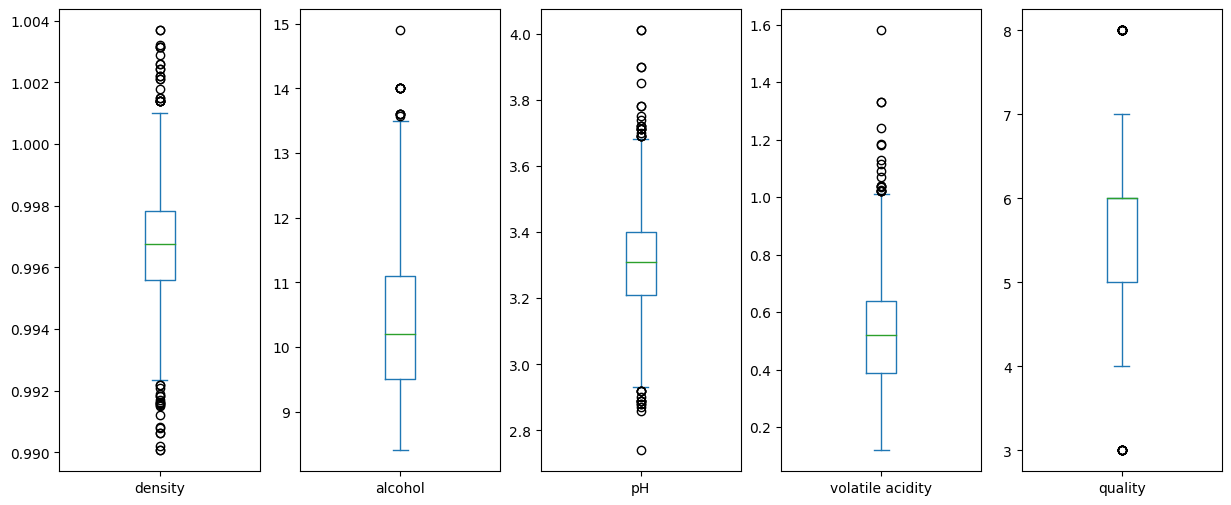

In [10]:
df.plot(subplots = True, kind = 'box', figsize = (15, 6));


#### Absolute range

In [11]:
min_df = df.min(axis = 0)
max_df = df.max(axis = 0)
columns_min_max = pd.concat([min_df, max_df], axis = 1).rename(columns={0: 'min', 1: 'max'})
columns_min_max

,min,max
density,0.99007,1.00369
alcohol,8.40000,14.90000
pH,2.74000,4.01000
volatile acidity,0.12000,1.58000
quality,3.00000,8.00000


#### __Remove outliers__

In [12]:
lower_range = columns_q1 - 1.5 * columns_IQR
upper_range = columns_q3 + 1.5 * columns_IQR


# Removing the outliers
def removeOutliers(df, col):
    outlier_free_list = [x for x in df[col] if ((x > lower_range[col]) & (x < upper_range[col]))]
    filtered_data = df.loc[df[col].isin(outlier_free_list)]
    return filtered_data

for col in df.columns:
    if col == df.columns[0]:
      filtered_data = removeOutliers(df, col)
    else:
      filtered_data = removeOutliers(filtered_data, col)

In [13]:
filtered_data.shape

(1486, 5)

#### __Correlation matrix__

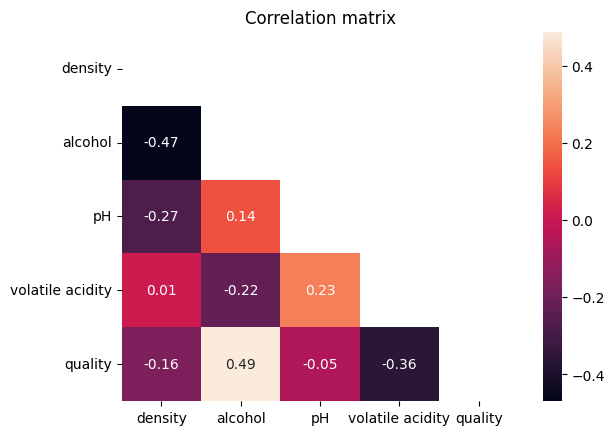

In [14]:
corr_mar = filtered_data.corr()
trimask = np.triu(np.ones_like(corr_mar, dtype=bool))

features = ['density', 'alcohol', 'pH', 'volatile acidity', 'quality']

sns.heatmap(corr_mar, annot=True, fmt = '.2f', xticklabels=features, yticklabels=features, mask = trimask)
plt.title('Correlation matrix')
plt.show()

#### __Covariance matrix__

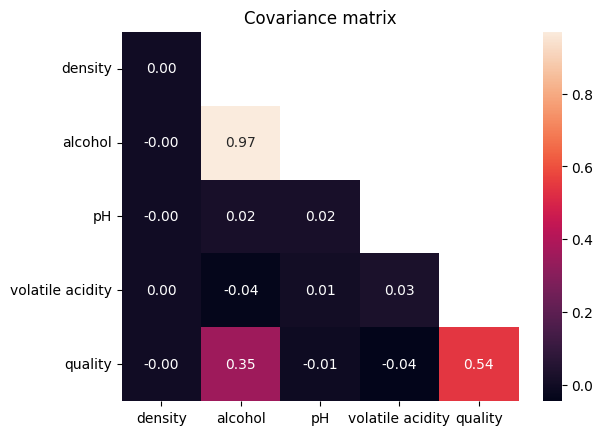

In [15]:
cov_mat = filtered_data.cov()
trimask = np.triu(np.ones_like(corr_mar, dtype=bool), 1)

features = ['density', 'alcohol', 'pH', 'volatile acidity', 'quality']

sns.heatmap(cov_mat, annot=True, fmt = '.2f', xticklabels=features, yticklabels=features, mask = trimask)
plt.title('Covariance matrix')
plt.show()

#### __PairPlot__

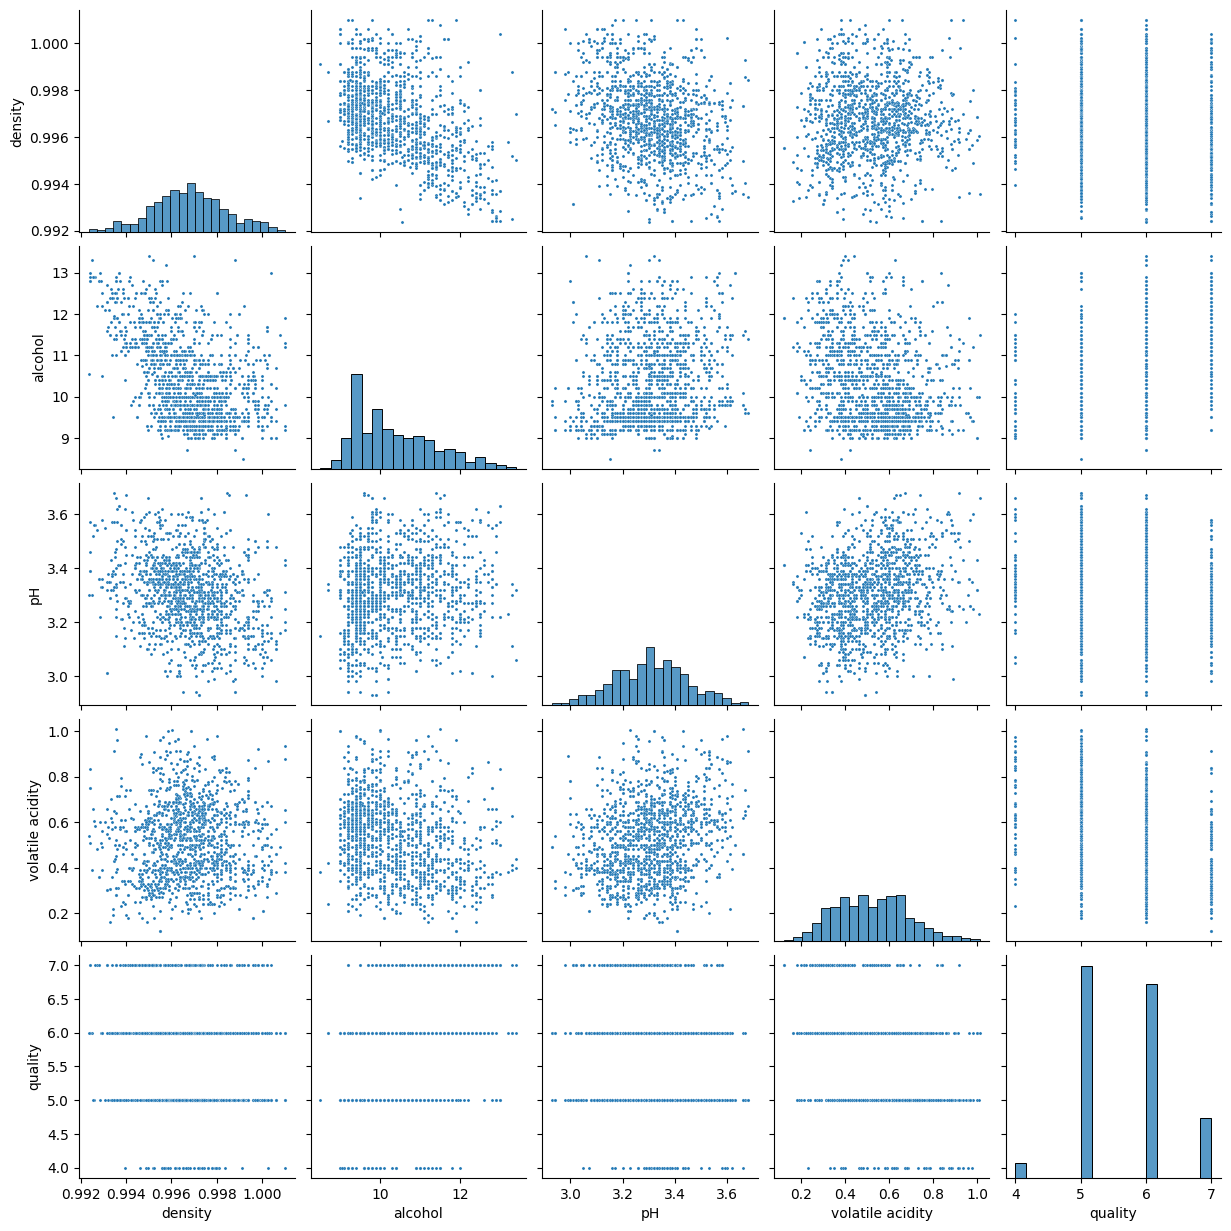

In [16]:
sns.pairplot(filtered_data, plot_kws={"s": 5})
plt.show()

## Problem 4 (Least squares)

1. Consider the Red Wine Quality Dataset of the previous question. Fit a least squares model to ``quality`` based on the other variables and a constant term. Report on the vector of regression coefficients $\hat{\beta}$. Make sure to indicate which entry is associated with each predictor. 
3. Plot the response values $y$ and the fitted response $\hat{y} = Z \hat{\beta}$
4. Illustrate the histogram of the residual vector $\hat{\epsilon}$; what is the average of this vector?
5. Write a code that verifies  (using e.g. ``numpy.isclose``):
 - $H = H^\top$ 
 - $H^2 = H$
 - $\hat{\epsilon}^\top \hat{y} = 0$ 
 - $\lambda_i(H) \in \{0,1\}$, where $\lambda_i$ is the $i$-th eigenvalue of $H$
 - $\|y\|^2 = \|\hat{\epsilon}\|^2 + \|\hat{y}\|^2$
 - $SS_{Tot} = SS_{Fit} + SS_{Res}$, for the sum of squares decomposition 

<hr>
<hr>

In [26]:
# 1.
features = ['density', 'alcohol', 'pH', 'volatile acidity', 'quality']

x = filtered_data.loc[:, features[:-1]]
z = np.c_[np.ones(x.shape[0]), x]

y = filtered_data.loc[:, features[-1]]

A = np.dot(np.linalg.inv(np.dot(z.T, z)), z.T)
beta_hat = np.dot(A, y)
y_hat = np.dot(z, beta_hat)

display(Math('\hat{\\beta}:'))
print(beta_hat)


<IPython.core.display.Math object>

[-15.444028    18.97765125   0.3433767   -0.25023346  -1.11027445]


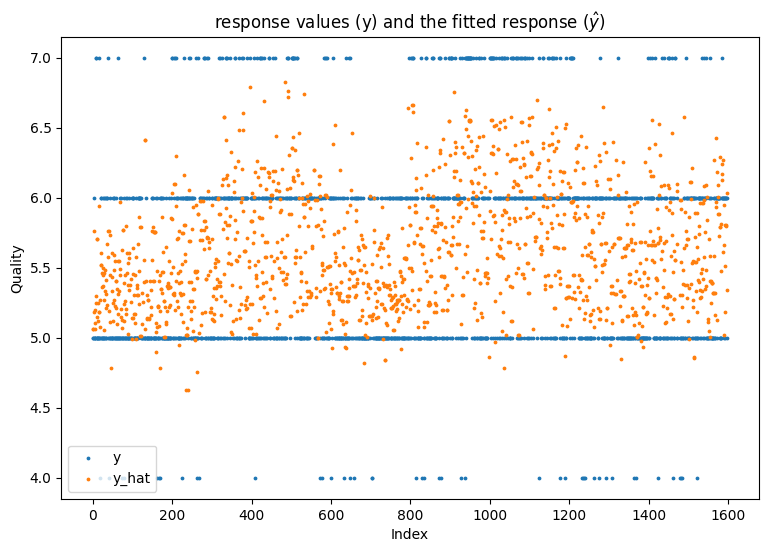

In [27]:
# 2.
xx = x.index.values

fig = plt.figure(figsize = (9, 6))
plt.scatter(xx, y, s = 3, label = 'y')
plt.scatter(xx, y_hat, s = 3, label = 'y_hat')
plt.xlabel('Index')
plt.ylabel('Quality')
plt.title("response values (y) and the fitted response ($\hat{y}$)")
plt.legend()
plt.show(fig)

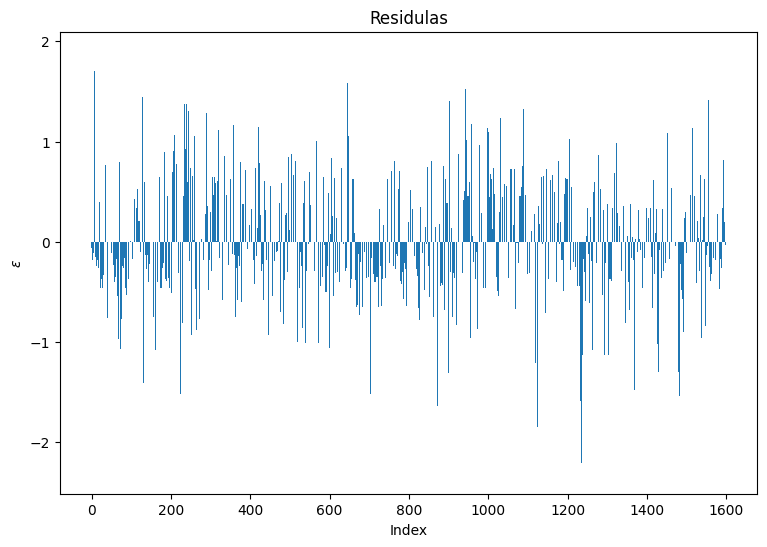

The average of this residuals is 4.2008049678249015e-10


In [28]:
# 3. 
fig = plt.figure(figsize = (9, 6))
e = y - y_hat
plt.bar(xx, e)
plt.xlabel('Index')
plt.ylabel('$\epsilon$')
plt.title("Residulas")
plt.show(fig)

print(f'The average of this residuals is {e.mean()}')

In [29]:
H = np.dot(z, A)

display(Math('H = H^{T} :'))
print(f'{np.allclose(H, H.T)}')

display(Math('H^{2} = H :'))
I = np.identity(H.shape[0])
print(f'{np.allclose(H ** 2, H, atol=1)}')

display(Math('\hat{\epsilon}^{T} \hat{y} = 0 :'))
e_hat = y - np.dot(z, beta_hat)
print(f'{np.allclose(np.dot(e_hat.T, y_hat), 0, atol=1)}')

display(Math('\lambda_i(H) \in \{0,1\} :'))
eigenvalues, _ = np.linalg.eigh(H)
print(all([np.isclose(i, 0) or np.isclose(i, 1) for i in eigenvalues]))

display(Math('$\|y\|^2 = \|\hat{\epsilon}\|^2 + \|\hat{y}\|^2 :'))
print(f'{np.allclose(np.linalg.norm(y) ** 2, np.linalg.norm(e_hat) ** 2 + np.linalg.norm(y_hat) ** 2, atol=1)}')

display(Math('SS_{Tot} = SS_{Fit} + SS_{Res} :'))
SS_tot = np.sum((y - y.mean())**2)
SS_fit = np.sum((y_hat - y.mean())**2)
SS_res = np.sum((y - y_hat)**2)
print(f'{np.isclose(SS_tot, (SS_fit + SS_res))}')

<IPython.core.display.Math object>

True


<IPython.core.display.Math object>

True


<IPython.core.display.Math object>

True


<IPython.core.display.Math object>

True


<IPython.core.display.Math object>

True


<IPython.core.display.Math object>

True


$\renewcommand{\var}{\mathrm{Var}}$
## Problem 5 (Weighted least squares)
In some cases we may want to weigh differently the controbution of each coordinate to the loss function. For example, this may be because not all meaasuremetns are equally reliable (e.g., new measurements may be more reliable than old ones). One way to account for this difference in reliability is by considering a *weighted* least squares problem, in which we seek $(\beta_1,\ldots,\beta_p) \in \reals^p$ to minimize 
$$
S(\beta_1,\ldots,\beta_p) := 
\sum_{i=1}^n w_i^2\left(y_i - \sum_{j=1}^p z_{ij} \beta_j \right)^2 = (\epsilon W)^\top (\epsilon W),
$$
where $$W = \begin{bmatrix}
    w_{1} & & \\
    & \ddots & \\
    & & w_{n}
    \end{bmatrix}$$ $w_i>0$ for all $i=1,\ldots,n$ are the weights associated with the reliability of each coordinate. 

1. Write the corresponding Normal Equations in a matrix form
2. Find the optimal vector of weights $\hat{\beta}$ minimizing $S(\beta_1,\ldots,\beta_p)$ in terms of $W$, $Z$, and $y$. 
3. What is the hat matrix $H$, i.e. the matrix that satisfies $\hat{y} = H y$ with $\hat{y} = \hat{\beta}Z$? (make sure that your expression reduces to the hat matrix from class when $W$ is the identity matrix) 
4. Show that $H^2 = H$ and $(I-H)^2 = I-H$

<hr>
<hr>

1. $$S(\beta_1,\ldots,\beta_p) := 
    \sum_{i=1}^n w_i^2\left(y_i - \sum_{j=1}^p z_{ij} \beta_j \right)^2 = (\epsilon W)^\top (\epsilon W)
    $$
    $$ \Downarrow $$
    $$S(\beta_1,\ldots,\beta_p) = 
    \sum_{i=1}^n w_i^2\left(y_i - z_{i} \beta \right)^2 = \left(W(y-Z\beta)\right)^T \left(W(y-Z\beta)\right)
    $$
    $$ \Downarrow $$
    $$ \frac{dS}{d \beta} = 2\frac{dS}{d \beta}\left[W(y-Z\beta)\right]\left(W(y-Z\beta)\right) = -2Z^{T}W^{2} \left(y-Z\beta \right)$$
    Setting to 0 to find the optimum:
    $$ -2Z^{T}W^{2} \left(y-Z\beta \right) = 0$$

    <br>
2.  <br>

    $$ -2Z^{T}W^{2} \left(y-Z\beta \right) = 0 \Rightarrow Z^{T}W^{2}y = Z^{T}W^{2}Z\beta $$

    Hence we have:
    $$ \beta = \left(Z^{T}W^{2}Z\right)^{-1}Z^{T}W^{2}y $$

3.  <br>

    $$ Z \beta = Z\left(Z^{T}W^{2}Z\right)^{-1}Z^{T}W^{2}y = Hy \Rightarrow  Z\left(Z^{T}W^{2}Z\right)^{-1}Z^{T}W^{2} = H$$

4.  1.  <br>

        $$ H = Z\left(Z^{T}W^{2}Z\right)^{-1}Z^{T}W^{2} $$
        $$ \Downarrow $$
        $$ H^2 = \left(Z\left(Z^{T}W^{2}Z\right)^{-1}Z^{T}W^{2}\right)^{T} \left(Z\left(Z^{T}W^{2}Z\right)^{-1}Z^{T}W^{2}\right) = Z\left(Z^{T}W^{2}Z\right)^{-1}\left(Z^{T}W^{2} Z\right) \left(Z^{T}W^{2}Z\right)^{-1}Z^{T}W^{2} = Z\left(Z^{T}W^{2}Z\right)^{-1}Z^{T}W^{2} = H$$
        <br>
    2. 
        $$ \left(I - H\right)^2 = I^2 - 2H + H^2 \underbrace{=}_{\text{from 4.1.}\; H = H^2} I - 2H + H = I - H $$


$$\renewcommand{\var}{\mathrm{Var}}$$
## Problem 6 (Sampling from $\mathcal N(0,1)$, $\chi^2$, $t$, and $F$)
In the following excerise, you can only sample using repeated calls to ``random.random()``. 
You can use the ``scipy.stats`` package *only* to illustrate PDFs. You should illustrate histograms with number of bins about 5%-10% of the number of samples $n=1,000$ in the input to the histogram. For example, use $100$ bins equally spaced between the range of the samples, so that you'll get a nice comparison between the empirical distribution and the theoretical distribution represented by the PDF. Make sure that the histogram is normalized to approximate the density of the simulated random variable. Set the seed ``random.seed(my_id)`` where ``my_id`` is your ID number with leading zeros removed. 

1. Implement the functions ``sample_unif``, ``sample_normal_clt``, and ``sample_normal``. Illustrate the histogram of $1000$ samples from ``sample_normal_clt`` and $1000$ samples from ``sample_normal``. Choose the input to ``sample_normal_clt`` so that the two histogram look alike. 
2. Implement the functions ``sample_chisq``, ``sample_t``, and ``sample_f``. You should use ``sample_normal`` repeatedly. 
3. Use ``sample_normal`` to sample $1000$ times from $\mathcal N(0,1)$ and use one figure to illustrate the histogram of the samples and the true PDF of $\mathcal N(0,1)$
4. Use ``sample_chisq`` to sample $1000$ times from $\chi^2_k$ and use one figure to illustrate the histogram of the samples and the true PDF of $\chi^2_k$; for $k=5$ and $k=10$.
5. Use ``sample_t`` to sample $1000$ times from $t_k$ (the $t$-distribution with $k$ degrees of freedom) and use one figure to illustrate the histogram of the samples and the true PDF of $t_k$; for $k=5$ and $k=10$.
6. Use ``sample_F`` to sample $1000$ times from $F_{k_1,k_2}$ and use one figure to illustrate the histogram of the samples and the true PDF of $F_{k_1,k_2}$; for $(k_1, k_2)= (10,5)$ and $(k_1, k_2)= (50,45)$.

In [22]:
import random
from scipy.stats import norm
import numpy as np

def sample_unif(n: int) -> float:
    """
    n independent samples from the uniform distribution over (0,1)
    """
    
    # YOUR CODE HERE
    pass


def sample_normal_clt(n: int) -> float:
    """
    Use the CLT to approximately sample from the standard normal distribution
    
    Args:
        n:    number of samples from a non-normal distribution
    
    Returns:
        z:    a random sample, approximately from the standard normal distribution
    
    """
    
    # YOUR CODE HERE
    
    pass

def sample_normal() -> float:
    """
    Sample from the standard normal distribution using a single sample
    from the uniform distribution. You should use the normal quantile function
    ``norm.ppf``
        
    Return:
        z:    a random sample from the standard normal distribution
    
    """
    
    # YOUR CODE HERE
    
    pass



def sample_chisq(k: int) -> float:
    """
    Sample from the chisquared distribution with k degrees of freedom
    
    Args:
        k:    number of degrees of freedom (DoF)
    
    Return:
        x:    random sample from the chisquared distribution with k degrees of freedom
    
    """
    
    # YOUR CODE HERE
    pass


def sample_t(k: int) -> float:
    """
    Sample from the t distribution with k degrees of freedom
    
    Args:
        k:    number of degrees of freedom
    
    Return:
        x:    random sample from the t distribution
    
    """
    
    # YOUR CODE HERE
    pass


def sample_f(k1: int, k2:int) -> float:
    """
    Sample from the F distribution with k1 over k2 degrees of freedom
    
    Args:
        k1:    number of degrees of freedom numerator
        k2:    number of degrees of freedom denominator
    
    Return:
        x:    random sample from the F distribution
    
    """
    
    # YOUR CODE HERE
    pass

In [23]:
MY_ID = 12345678 # your personal ID number with leading zeros removed
random.seed(MY_ID)

# Your code to items 2-4 goes here:
# 

<hr>
<hr>